In [203]:
import pandas as pd
!ls -lh *.csv

-rw-r--r--@ 1 josiahbjorgaard  staff   3.3M Nov 19 12:54 CMU_EAO_total_loss.csv
-rw-r--r--@ 1 josiahbjorgaard  staff   5.2K Nov 19 12:55 CMU_EAO_val_epoch_loss.csv
-rw-r--r--@ 1 josiahbjorgaard  staff   2.5M Nov 19 12:49 TCGA_EAO_total_loss.csv
-rw-r--r--@ 1 josiahbjorgaard  staff    23K Nov 19 12:50 TCGA_EAO_val_epoch_loss.csv
-rw-r--r--@ 1 josiahbjorgaard  staff    11K Mar  8  2024 basicdata.csv
-rw-r--r--  1 josiahbjorgaard  staff    11K Mar  8  2024 basicdata_tcga.csv
-rw-r--r--  1 josiahbjorgaard  staff   3.3K Mar  8  2024 basicdata_tcga_c.csv
-rw-r--r--@ 1 josiahbjorgaard  staff   3.8K Mar 28  2024 chembertatrain.csv
-rw-r--r--@ 1 josiahbjorgaard  staff    10K Mar  8  2024 data_proc_tcga.csv
-rw-r--r--@ 1 josiahbjorgaard  staff   3.3K Mar  8  2024 data_proc_tcga_c.csv
-rw-r--r--@ 1 josiahbjorgaard  staff    34K Mar  8  2024 data_procs.csv
-rw-r--r--@ 1 josiahbjorgaard  staff    10K Mar 19  2024 data_procs_trimmed.csv
-rw-r--r--@ 1 josiahbjorgaard  staff    73K Mar 28  2024 data_p

In [204]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
list(colormaps)
plt.rcParams['image.cmap'] = 'Pastel1'

In [248]:
#dfq=pd.read_csv('final_data_final.csv')
#dfr=pd.read_csv('final_data_revised_recall_metrics.csv')
df = pd.read_csv('data_publish.csv')
df_eao = pd.read_csv('eao_embedding_results.csv')
df=pd.concat([df,df_eao])

In [249]:
print(list(df['sparsity']))

[80, 80, 80, 80, 80, 80, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 20, 0, 40, 20, 0, 20, 20, 20, 0, 20, 0, 0, 0, 0, 20, 40, 60, 80, 0, 20, 40, 60, 80, 0, 20, 40, 60, 80, 0, 20, 40, 60, 80, 0, 20, 40, 60, 80, 0, 20, 40, 60, 80, 60, 20, 40, 0, 0, 60, 20, 40]


In [250]:
df['model']=['zorro' if 'z' in x else 'mfd' if 'm' in x else 'eao' if 'eao' in x.lower() else 'jepa' for x in df['Name']]

/var/folders/fj/g190z8y944x0v6yd0lpw_8980000gn/T/ipykernel_50297/3032270332.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model']=['zorro' if 'z' in x else 'mfd' if 'm' in x else 'eao' if 'eao' in x.lower() else 'jepa' for x in df['Name']]


In [251]:
df.model

0      mfd
1      mfd
2    zorro
3      mfd
4    zorro
     ...  
3      eao
4      eao
5      eao
6      eao
7      eao
Name: model, Length: 68, dtype: object

In [252]:
df

Name  sparsity                     embedding_dir  epochs  \
0    m0_bm_d80_32e        80            CMU_config1_d80_bm_32i    5120   
1    m0_bm_d80_12e        80  training_output_17_19_07_03_2024    5120   
2    z0_bm_d80_32e        80          CMU_config1_z_d80_bm_32i    5120   
3     m0_bm_d80_4e        80             CMU_config1_d80_bm_4i    5120   
4     z0_bm_d80_4e        80           CMU_config1_z_d80_bm_4i    5120   
..             ...       ...                               ...     ...   
3      tcga_eao_45         0              TCGA_config1_EAO_45i   10001   
4       CMU_EAO_6i         0                CMU_config1_EAO_6i    5120   
5   CMU_EAO_d60_6e        60            CMU_config1_EAO_d60_6i    5120   
6   CMU_EAO_d20_6e        20            CMU_config1_EAO_d20_6i    5120   
7   CMU_EAO_d40_6e        40            CMU_config1_EAO_d40_6i    5120   

    hidden_size loss_type       lr lr_scheduler_type metric model_type  ...  \
0           256        L1  0.00001            cosine    PCC       skip  ...   
1           256        L1  0.00001            cosine    PCC       skip  ...   
2           256        L1  0.00001            cosine    PCC       skip  ...   
3           256        L1  0.00001            cosine    PCC       skip  ...   
4           256        L1  0.00001            cosine    PCC       skip  ...   
..          ...       ...      ...               ...    ...        ...  ...   
3           256       BCE  0.00010            cosine     F1     linear  ...   
4           256        L1  0.00001            cosine    PCC     linear  ...   
5           256        L1  0.00001            cosine    PCC     linear  ...   
6           256        L1  0.00001            cosine    PCC     linear  ...   
7           256        L1  0.00001            cosine    PCC     linear  ...   

                                      Commit  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
..                                       ...   
3   a4619f9cdd55169b87dc225fee0d49ce59baa5b7   
4   a4619f9cdd55169b87dc225fee0d49ce59baa5b7   
5   a4619f9cdd55169b87dc225fee0d49ce59baa5b7   
6   a4619f9cdd55169b87dc225fee0d49ce59baa5b7   
7   a4619f9cdd55169b87dc225fee0d49ce59baa5b7   

                                               GitHub  GPU Count  \
0                                                 NaN        NaN   
1                                                 NaN        NaN   
2                                                 NaN        NaN   
3                                                 NaN        NaN   
4                                                 NaN        NaN   
..                                                ...        ...   
3   https://github.com/josiahbjorgaard/mca-paper/t...        8.0   
4   https://github.com/josiahbjorgaard/mca-paper/t...        8.0   
5   https://github.com/josiahbjorgaard/mca-paper/t...        8.0   
6   https://github.com/josiahbjorgaard/mca-paper/t...        8.0   
7   https://github.com/josiahbjorgaard/mca-paper/t...        8.0   

                 GPU Type  batch_size  clip dropout wandb_account_name  \
0                     NaN         NaN   NaN     NaN                NaN   
1                     NaN         NaN   NaN     NaN                NaN   
2                     NaN         NaN   NaN     NaN                NaN   
3                     NaN         NaN   NaN     NaN                NaN   
4                     NaN         NaN   NaN     NaN                NaN   
..                    ...         ...   ...     ...                ...   
3   NVIDIA A100-SXM4-80GB      1024.0   2.0     0.1    josiahbjorgaard   
4   NVIDIA A100-SXM4-80GB      1024.0   2.0     0.1    josiahbjorgaard   
5   NVIDIA A100-SXM4-80GB      1024.0   2.0     0.1    josiahbjorgaard   
6   NVIDIA A100-SXM4-80GB      1024.0   2.

In [253]:
df_x = df#df.query('init_sparse==eval_sparse')

In [254]:
df_x['test_r1_mean']=df_x[[x for x in df_x.columns if x.endswith('test_r1')]].mean(axis=1)
df_x['test_r5_mean']=df_x[[x for x in df_x.columns if x.endswith('test_r5')]].mean(axis=1)
df_x['test_r10_mean']=df_x[[x for x in df_x.columns if x.endswith('test_r10')]].mean(axis=1)
df_x['test_median_rank_mean']=df_x[[x for x in df_x.columns if x.endswith('test_median_rank')]].mean(axis=1)
df_x['test_alignment_mean']=df_x[[x for x in df_x.columns if x.endswith('test_alignment')]].mean(axis=1)
df_x['test_uniformity_mean']=df_x[[x for x in df_x.columns if x.endswith('test_uniformity')]].mean(axis=1)
df_x['train_r1_mean']=df_x[[x for x in df_x.columns if x.endswith('train_r1')]].mean(axis=1)
df_x['train_r5_mean']=df_x[[x for x in df_x.columns if x.endswith('train_r5')]].mean(axis=1)
df_x['train_r10_mean']=df_x[[x for x in df_x.columns if x.endswith('train_r10')]].mean(axis=1)
df_x['train_median_rank_mean']=df_x[[x for x in df_x.columns if x.endswith('train_median_rank')]].mean(axis=1)
df_x['train_alignment_mean']=df_x[[x for x in df_x.columns if x.endswith('train_alignment')]].mean(axis=1)
df_x['train_uniformity_mean']=df_x[[x for x in df_x.columns if x.endswith('train_uniformity')]].mean(axis=1)

In [255]:
df_x['train_pcc']

KeyError: 'train_pcc'

In [256]:
#df_x.to_csv('basicdata_tcga_c.csv')
#df_x = pd.read_csv('basicdata_tcga.csv')
#df_x = pd.read_csv('basicdata.csv')

In [257]:
df_x[[x for x in df_x.columns if 'mean' in x]] #Alignment needs to be done with masks!!!

test_r1_mean  test_r5_mean  test_r10_mean  test_median_rank_mean  \
0       0.643326      0.751199       0.813694                   0.00   
1       0.422328      0.598064       0.677367                   4.75   
2       0.387825      0.516597       0.601652                   4.25   
3       0.145402      0.272870       0.363802                  57.25   
4       0.127896      0.190311       0.225959                 338.75   
..           ...           ...            ...                    ...   
3       0.449353      0.740302       0.836925                   0.75   
4       0.494828      0.690517       0.760022                   2.50   
5       0.453986      0.555192       0.617676                  14.00   
6       0.354215      0.569681       0.658812                   8.50   
7       0.382256      0.543337       0.619710                  11.25   

    test_alignment_mean  test_uniformity_mean  train_r1_mean  train_r5_mean  \
0              1.526474             -8.525817       0.782507       0.893140   
1              2.131553             -6.293499       0.485468       0.657048   
2              2.205920             -7.526360       0.489811       0.627752   
3              1.899675             -3.634418       0.149464       0.277689   
4              3.327008             -3.601986       0.134599       0.199214   
..                  ...                   ...            ...            ...   
3              0.441695             -4.628978       0.653081       0.889100   
4              0.501139             -3.377376       0.584465       0.768869   
5              0.184594             -2.688173       0.535627       0.633285   
6              0.415675             -3.340502       0.461616       0.657188   
7              0.266813             -2.831116       0.476113       0.628733   

    train_r10_mean  train_median_rank_mean  train_alignment_mean  \
0         0.950323                    0.00              0.985095   
1         0.729477                    4.50              1.917804   
2         0.714273                    3.00              1.747880   
3         0.353529                   54.75              1.891077   
4         0.237476                  328.25              3.287553   
..             ...                     ...                   ...   
3         0.941619                    0.00              0.347962   
4         0.828956                    2.25              0.463798   
5         0.690231                   10.75              0.150573   
6         0.736365                    7.25              0.372341   
7         0.699390                    8.50              0.226877   

    train_uniformity_mean  
0               -8.837949  
1               -6.386066  
2               -7.492154  
3               -3.627427  
4               -3.620365  
..                    ...  
3               -4.673959  
4               -3.395037  
5               -2.716157  
6               -3.363075  
7               -2.858489  

[68 rows x 12 columns]

In [258]:
[x for x in df_x['Name'].values if 'z' in x]

['z0_bm_d80_32e',
 'z0_bm_d80_4e',
 'z0_bm_d80_12e',
 'z0_bm_d60_4e',
 'z0_bm_d60_32e',
 'z0_bm_d60_12e',
 'z0_bm_d40_32e',
 'z0_bm_d40_4e',
 'z0_bm_d40_12e',
 'z0_bm_d20_4e',
 'z0_bm_d0_4e',
 'z0_bm_d20_32e',
 'z0_bm_d0_32e',
 'z0_bm_d20_12e',
 'z0_bm_d0_12e',
 'mt_z_60e',
 'mt_z_60e_20i',
 'mt_z_60e_40i',
 'mt_z_60e_60i',
 'mt_z_60e_80i',
 'mt_z_80e',
 'mt_z_80e_20i',
 'mt_z_80e_40i',
 'mt_z_80e_60i',
 'mt_z_80e_80i',
 'z0_bm_d0_10e',
 'z0_bm_d20_10e',
 'z0_bm_d40_10e',
 'z0_bm_d60_10e',
 'z0_bm_d80_10e']

In [259]:
df_z_a.epoch

50    80
45    60
51    80
46    60
52    80
47    60
48    60
53    80
49    60
54    80
Name: epoch, dtype: object

In [260]:
df_m = df_x[df_x['model']=='mfd'].sort_values('sparsity')
df_m['epoch']= [x.split('_')[-1][:-1] for x in df_m['Name'].values]
df_z = df_x[df_x['model']=='zorro'].sort_values('sparsity')
df_e = df_x[df_x['model']=='eao'].sort_values('sparsity')
df_e['epoch']= ['45','6','45','6','45','6','45','6']
df_m_a = df_m[df_m['loss_type']=='BCE'].sort_values('sparsity')
df_m_a['epoch']= [x.split('_')[1][:-1] for x in df_m_a['Name'].values]
df_m_b = df_m[df_m['loss_type']=='L1'].sort_values('sparsity')
df_z_a = df_z[df_z['loss_type']=='BCE'].sort_values('sparsity')
df_z_a['epoch']= [x.split('_')[2][:-1] for x in df_z_a['Name'].values]
df_z_b = df_z[df_z['loss_type']=='L1'].sort_values('sparsity')
df_z_b['epoch']= [x.split('_')[-1][:-1] for x in df_z_b['Name'].values]
df_e_a = df_e[df_e['loss_type']=='BCE'].sort_values('sparsity')
df_e_b = df_e[df_e['loss_type']=='L1'].sort_values('sparsity')
#df_e_b['epoch']= ["".join([x for x in x.split('_') if 'i' in x or 'e' in x])[:-1] for x in df_e_b['Name'].values]

In [261]:
df_z_b.epoch

25    12
55    10
21    32
18     4
24    12
20    32
56    10
17     4
57    10
13    32
14     4
15    12
58    10
9     12
7     32
6      4
2     32
5     12
4      4
59    10
Name: epoch, dtype: object

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


train_loss (Min)
eval_loss (Min)


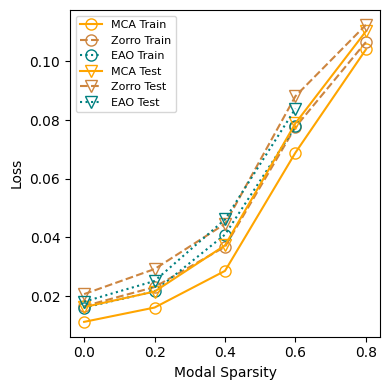

In [429]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,4))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t=df_m_a[df_m_a['epoch']=='60']
dfz_t=df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']
for x in ['train_loss (Min)','eval_loss (Min)']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]
        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8,markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8,markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8,markerfacecolor='none')
plt.ylabel('Loss')
plt.xlabel('Modal Sparsity')
plt.legend(['MCA Train','Zorro Train', 'EAO Train','MCA Test', 'Zorro Test','EAO Test'],fontsize=8)#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_6d.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


train_auprc (Max)
eval_auprc (Max)


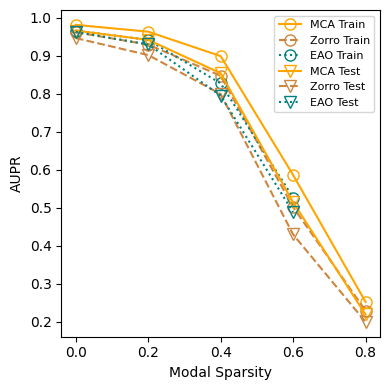

In [428]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,4))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t=df_m_a[df_m_a['epoch']=='60']
dfz_t=df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']

for x in ['train_auprc (Max)','eval_auprc (Max)']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')

plt.ylabel('AUPR')
plt.xlabel('Modal Sparsity')
plt.legend(['MCA Train','Zorro Train', 'EAO Train','MCA Test', 'Zorro Test','EAO Test'], fontsize=8)#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_6c.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


25    12
55    10
21    32
18     4
24    12
20    32
56    10
17     4
57    10
13    32
14     4
15    12
58    10
9     12
7     32
6      4
2     32
5     12
4      4
59    10
Name: epoch, dtype: object
train_loss (Min)
eval_loss (Min)


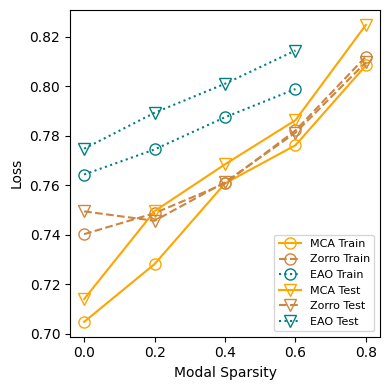

In [426]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,4))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']
print(df_z_b.epoch)
#print(df_z_b['epoch']=='12')
for x in ['train_loss (Min)','eval_loss (Min)']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')

plt.ylabel('Loss')
plt.xlabel('Modal Sparsity')
plt.legend(['MCA Train','Zorro Train', 'EAO Train','MCA Test', 'Zorro Test','EAO Test'], fontsize=8)#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_6b.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


train_pcc (Max)
4    0.440545
6    0.412583
7    0.366246
5    0.301229
Name: train_pcc (Max), dtype: float64
eval_pcc (Max)
4    0.452012
6    0.413313
7    0.376128
5    0.294909
Name: eval_pcc (Max), dtype: float64


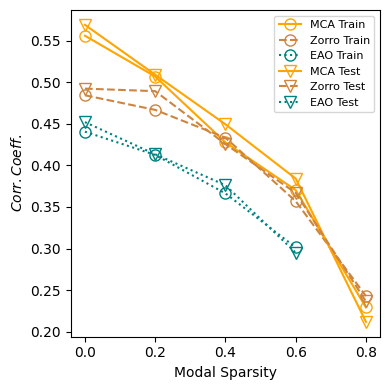

In [427]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,4))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']
#print(df_z_b['epoch']=='12')
for x in ['train_pcc (Max)','eval_pcc (Max)']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]
        print(ye)
        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8,markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8,markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8,markerfacecolor='none')

plt.ylabel('$Corr. Coeff.$')
plt.xlabel('Modal Sparsity')
plt.legend(['MCA Train','Zorro Train', 'EAO Train','MCA Test', 'Zorro Test','EAO Test'], fontsize=8)#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_6a.eps', format='eps', dpi=1200)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


test_uniformity_fusion
30   -8.653053
31   -9.461920
32   -6.871411
33   -4.058322
34   -1.738564
Name: test_uniformity_fusion, dtype: float64
25   -6.754530
24   -7.277419
15   -6.549629
9    -3.991693
5    -1.698338
Name: test_uniformity_fusion, dtype: float64
               Name  sparsity             embedding_dir  epochs  hidden_size  \
3       tcga_eao_45         0      TCGA_config1_EAO_45i   10001          256   
1  tcga_eao_d20_45i        20  TCGA_config1_EAO_d20_45i   10001          256   
2  tcga_eao_40e_45i        40  TCGA_config1_EAO_d40_45i   10001          256   
0  tcga_eao_d60_45i        60  TCGA_config1_EAO_d60_45i   10001          256   

  loss_type      lr lr_scheduler_type metric model_type  ...  \
3       BCE  0.0001            cosine     F1     linear  ...   
1       BCE  0.0001            cosine     F1     linear  ...   
2       BCE  0.0001            cosine     F1     linear  ...   
0       BCE  0.0001            cosine     F1     linear  ...   

   test_median_

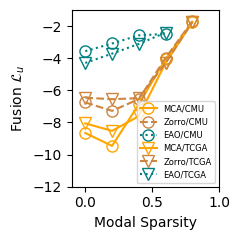

In [436]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2.5,2.5))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']

#print(df_z_b['epoch']=='12')
for x in ['test_uniformity_fusion']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        print(ym)
        print(yz)
        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8,markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')

df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']
print(dfe_t)
#print(df_z_b['epoch']=='12')
for x in ['test_uniformity_fusion']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')

plt.ylim(-12,-1)
plt.xlim(-0.1,1)
plt.ylabel('Fusion $\mathcal{L}_{u}$')
plt.xlabel('Modal Sparsity')
plt.legend(['MCA/CMU','Zorro/CMU', 'EAO/CMU','MCA/TCGA', 'Zorro/TCGA','EAO/TCGA'], fontsize=6,loc='lower right')#,bbox_to_anchor=(1.0,1.3),borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_3a.eps', format='eps', dpi=1200)


test_uniformity_mean
test_uniformity_mean


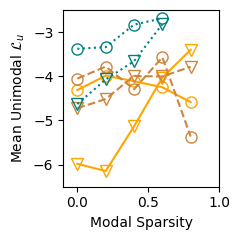

In [434]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2.5,2.5))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']

#print(df_z_b['epoch']=='12')
for x in ['test_uniformity_mean']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]
        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
        
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']
for x in ['test_uniformity_mean']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]
        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
plt.ylim(-6.5,-2.5)
plt.xlim(-0.1,1)
plt.ylabel('Mean Unimodal $\mathcal{L}_{u}$')
plt.xlabel('Modal Sparsity')
#plt.legend(['MCA/CMU-MOSEI','Zorro/CMU-MOSEI', 'EAO/CMU-MOSEI','MCA/TCGA', 'Zorro/TCGA','EAO/TCGA'], loc=4, fontsize=8)#bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_3b.eps', format='eps', dpi=1200)


test_alignment_mean
test_alignment_mean


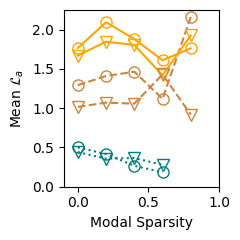

In [435]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2.5,2.5))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']

#print(df_z_b['epoch']=='12')
for x in ['test_alignment_mean']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
        
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']

#print(df_z_b['epoch']=='12')
for x in ['test_alignment_mean']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')
        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
plt.ylim(0.0,2.25)
plt.xlim(-0.1,1)
plt.ylabel('Mean $\mathcal{L}_{a}$')
plt.xlabel('Modal Sparsity')
#plt.legend(['MCA/CMU-MOSEI','Zorro/CMU-MOSEI', 'EAO/CMU-MOSEI','MCA/TCGA', 'Zorro/TCGA','EAO/TCGA'], loc=4, fontsize=8)#bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_3c.eps', format='eps', dpi=1200)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


train_median_rank_mean
test_median_rank_mean


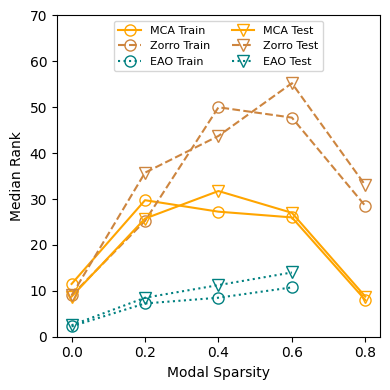

In [433]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,4))
lt = iter(['-o','--o',':o','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']
#print(df_z_b['epoch']=='12')
for x in ['train_median_rank_mean','test_median_rank_mean']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
plt.ylim(0,70)
plt.ylabel('Median Rank')
plt.xlabel('Modal Sparsity')
plt.legend(['MCA Train','Zorro Train', 'EAO Train','MCA Test', 'Zorro Test','EAO Test'], loc=9, ncols=2,fontsize=8)#bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.tight_layout()
plt.savefig('fig_4c.eps', format='eps', dpi=1200)


test_r10_mean
test_r5_mean
test_r1_mean


<Figure size 640x480 with 0 Axes>

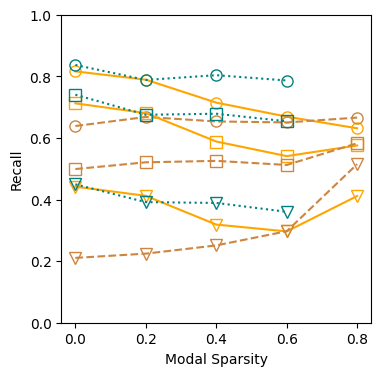

In [351]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
plt.figure(figsize=(4,4))
#colors = iter(plt.cm.Set3(np.linspace(0,1,5)))
lt = iter(['-o','--o',':o','-s','--s',':s','-v','--v',':v'])

df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']

#print(df_z_b['epoch']=='12')
for x in ['test_r10_mean','test_r5_mean','test_r1_mean',]:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
plt.ylabel('Recall')
plt.xlabel('Modal Sparsity')
plt.ylim(0.0,1.0)
#plt.legend(['MCA $R_1$','MMA $R_1$', 'MCA $R_5$', 'MMA $R_5$','MCA $R_{10}$', 'MMA $R_{10}$'],loc=4)#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.savefig('fig_5t.eps', format='eps', dpi=1200)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


test_r10_mean
test_r5_mean
test_r1_mean


<Figure size 640x480 with 0 Axes>

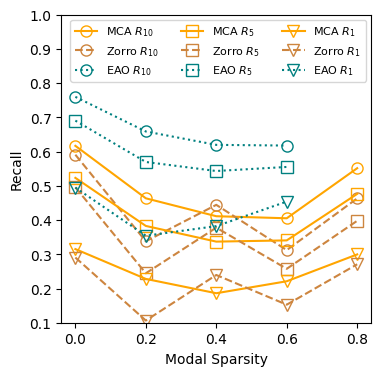

In [350]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
plt.figure(figsize=(4,4))
#colors = iter(plt.cm.Set3(np.linspace(0,1,5)))
lt = iter(['-o','--o',':o','-s','--s',':s','-v','--v',':v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']

#print(df_z_b['epoch']=='12')
for x in ['test_r10_mean','test_r5_mean','test_r1_mean',]:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]

        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')

plt.ylabel('Recall')
plt.xlabel('Modal Sparsity')
plt.ylim(0.1,1.)
plt.legend(['MCA $R_{10}$','Zorro $R_{10}$','EAO $R_{10}$', 'MCA $R_5$', 'Zorro $R_5$','EAO $R_{5}$','MCA $R_{1}$', 'Zorro $R_{1}$','EAO $R_{1}$'], ncols=3,fontsize=8) #, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
#plt.tight_layout()
plt.savefig('fig_5c.eps', format='eps', dpi=1200)


train_median_rank_mean
test_median_rank_mean


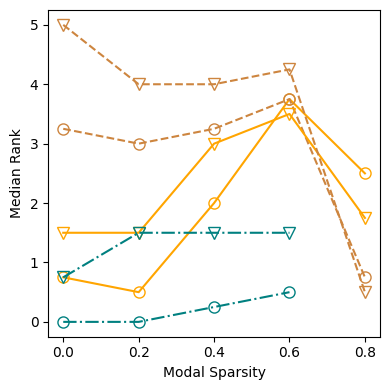

In [432]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,4))
lt = iter(['-o','--o','-.o','-v','--v','-.v'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
dfe_t=df_e_a[df_e_a['epoch']=='45']

#print(df_z_b['epoch']=='12')
for x in ['train_median_rank_mean','test_median_rank_mean']:
        print(x)
        ym = df_t[x]
        yz = dfz_t[x]
        ye = dfe_t[x]
        if ym.max() > 10:
            ym = ym+1
            yz = yz+1
            plt.yscale('log')

        plt.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8, markerfacecolor='none')
        plt.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8, markerfacecolor='none')
        plt.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8, markerfacecolor='none')
plt.ylabel('Median Rank')
plt.xlabel('Modal Sparsity')
plt.tight_layout()
#plt.legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'])#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
plt.savefig('fig_4t.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 200x800 with 0 Axes>

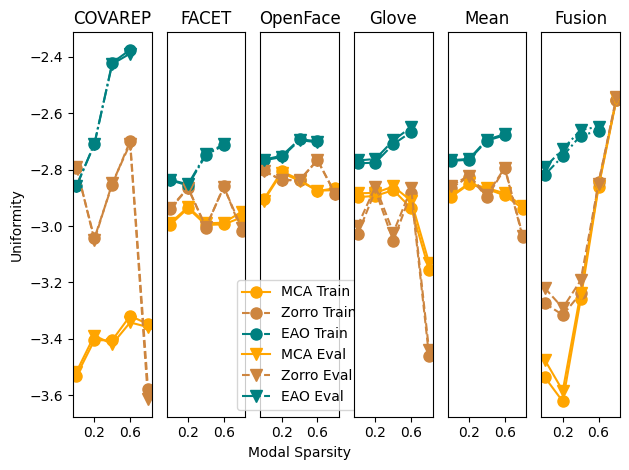

In [278]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,8))
lt = iter(['-o','--o','-v','--v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
dfe_t=df_e_b[df_e_b['epoch']=='6']

#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,6)
cols = {'COVAREP':('COVAREP_train_uniformity',
        'COVAREP_test_uniformity'),
        'FACET':('FACET_train_uniformity',
        'FACET_test_uniformity'),
        'OpenFace':('OpenFace_train_uniformity',
        'OpenFace_test_uniformity'),
        'Glove':('glove_vectors_train_uniformity',
        'glove_vectors_test_uniformity'),
        'Mean':('train_uniformity_mean',
        'test_uniformity_mean'),
        'Fusion':('train_uniformity_fusion',
                 'test_uniformity_fusion'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-.o','-v','--v','-.v'])
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            ye = dfe_t[x]

            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='orange', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='peru',markersize=8)
            ax.plot(dfe_t['sparsity']/100,ye,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('Uniformity')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-4].legend(['MCA Train','Zorro Train', 'EAO Train','MCA Eval', 'Zorro Eval','EAO Eval'],loc="lower center")#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$'])
#, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))
fig.savefig('fig_a3uc.eps', format='eps', dpi=1200)

In [956]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-.o','-v','--v','-.v'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'COVAREP':('COVAREP_train_alignment',
        'COVAREP_test_alignment'),
        'FACET':('FACET_train_alignment',
        'FACET_test_alignment'),
        'OpenFace':('OpenFace_train_alignment',
        'OpenFace_test_alignment'),
        'Glove':('glove_vectors_train_alignment',
        'glove_vectors_test_alignment'),
        'Mean':('train_alignment_mean',
        'test_alignment_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-X','--X'])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('Alignment')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()

leg=axs[-1].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'])#, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))
fig.savefig('fig_a3ac.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


('COVAREP_train_alignment', 'COVAREP_test_alignment')
('FACET_train_alignment', 'FACET_test_alignment')
('OpenFace_train_alignment', 'OpenFace_test_alignment')
('glove_vectors_train_alignment', 'glove_vectors_test_alignment')
('train_alignment_mean', 'test_alignment_mean')


<Figure size 200x400 with 0 Axes>

In [957]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'Gene':('gene_train_alignment',
        'gene_test_alignment'),
        'Protein':('protein_train_alignment',
        'protein_test_alignment'),
        'Methylation':('methylation_train_alignment',
        'methylation_test_alignment'),
        'miRNA':('mirna_train_alignment',
        'mirna_test_alignment'),
        'Mean':('train_alignment_mean',
        'test_alignment_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('Alignment')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-2].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'])#, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))
fig.savefig('fig_a3at.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


('gene_train_alignment', 'gene_test_alignment')
('protein_train_alignment', 'protein_test_alignment')
('methylation_train_alignment', 'methylation_test_alignment')
('mirna_train_alignment', 'mirna_test_alignment')
('train_alignment_mean', 'test_alignment_mean')


<Figure size 200x400 with 0 Axes>

In [958]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,6)
cols = {'Gene':('gene_train_uniformity',
        'gene_test_uniformity'),
        'Protein':('protein_train_uniformity',
        'protein_test_uniformity'),
        'Methylation':('methylation_train_uniformity',
        'methylation_test_uniformity'),
        'miRNA':('mirna_train_uniformity',
        'mirna_test_uniformity'),
        'Mean':('train_uniformity_mean',
        'test_uniformity_mean'),
        'Fusion':('train_uniformity_fusion',
                 'test_uniformity_fusion'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('Uniformity')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-1].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'])#, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))
fig.savefig('fig_a3ut.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


('gene_train_uniformity', 'gene_test_uniformity')
('protein_train_uniformity', 'protein_test_uniformity')
('methylation_train_uniformity', 'methylation_test_uniformity')
('mirna_train_uniformity', 'mirna_test_uniformity')
('train_uniformity_mean', 'test_uniformity_mean')
('train_uniformity_fusion', 'test_uniformity_fusion')


<Figure size 200x400 with 0 Axes>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


('gene_train_r1', 'gene_test_r1')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.682668
36    0.512493
37    0.355270
38    0.316946
39    0.370579
Name: gene_train_r1, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.439655
36    0.446043
37    0.326923
38    0.322097
39    0.349593
Name: gene_test_r1, dtype: float64
('protein_train_r1', 'protein_test_r1')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.748574
36    0.636418
37    0.450919
38    0.361240
39    0.378292
Name: protein_train_r1, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.586207
36    0.486989
37    0.393443
38    0.316547
39    0.377953
Name: protein_test_r1, dtype: float64
('methylation_train_r1', 'methylation_test_r1')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.280577
36    0.32

<Figure size 200x400 with 0 Axes>

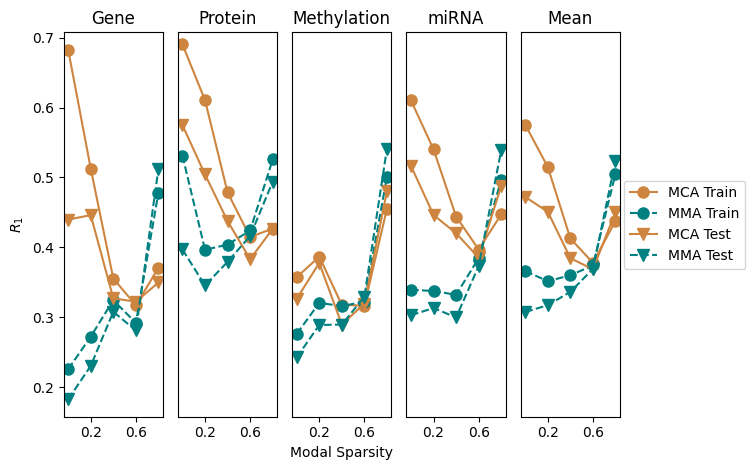

In [959]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'Gene':('gene_train_r1',
        'gene_test_r1'),
        'Protein':('protein_train_r1',
        'protein_test_r1'),
        'Methylation':('methylation_train_r1',
        'methylation_test_r1'),
        'miRNA':('mirna_train_r1',
        'mirna_test_r1'),
        'Mean':('train_r1_mean',
        'test_r1_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('$R_1$')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-1].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))
fig.savefig('fig_a3.eps', format='eps', dpi=1200)

('gene_train_r5', 'gene_test_r5')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.921736
36    0.799331
37    0.643943
38    0.573541
39    0.542605
Name: gene_train_r5, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.764368
36    0.717626
37    0.584135
38    0.606742
39    0.560976
Name: gene_test_r5, dtype: float64
('protein_train_r5', 'protein_test_r5')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.931084
36    0.855044
37    0.700262
38    0.605426
39    0.584996
Name: protein_train_r5, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.785920
36    0.732342
37    0.637002
38    0.564748
39    0.598425
Name: protein_test_r5, dtype: float64
('methylation_train_r5', 'methylation_test_r5')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.599651
36    0.62

<Figure size 200x400 with 0 Axes>

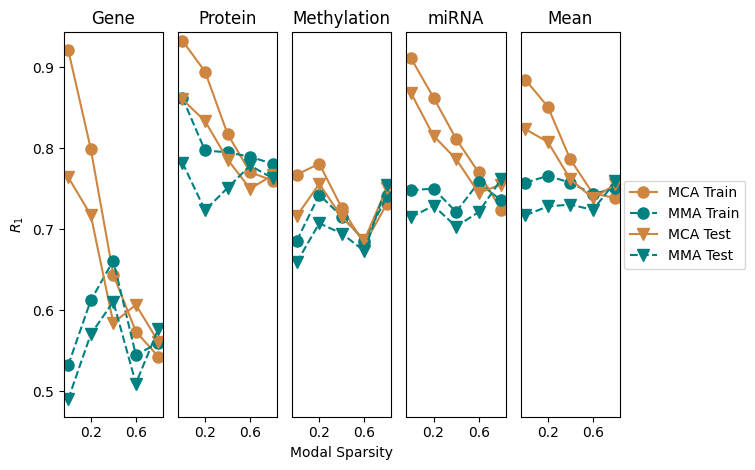

In [960]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'Gene':('gene_train_r5',
        'gene_test_r5'),
        'Protein':('protein_train_r5',
        'protein_test_r5'),
        'Methylation':('methylation_train_r5',
        'methylation_test_r5'),
        'miRNA':('mirna_train_r5',
        'mirna_test_r5'),
        'Mean':('train_r5_mean',
        'test_r5_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('$R_1$')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-1].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

('gene_train_r10', 'gene_test_r10')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.968314
36    0.887468
37    0.747247
38    0.716627
39    0.624598
Name: gene_train_r10, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.869253
36    0.818345
37    0.704327
38    0.741573
39    0.617886
Name: gene_test_r10, dtype: float64
('protein_train_r10', 'protein_test_r10')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.969423
36    0.907466
37    0.794751
38    0.708140
39    0.658420
Name: protein_train_r10, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.857759
36    0.821561
37    0.742389
38    0.661871
39    0.669291
Name: protein_test_r10, dtype: float64
('methylation_train_r10', 'methylation_test_r10')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.748891


<Figure size 200x400 with 0 Axes>

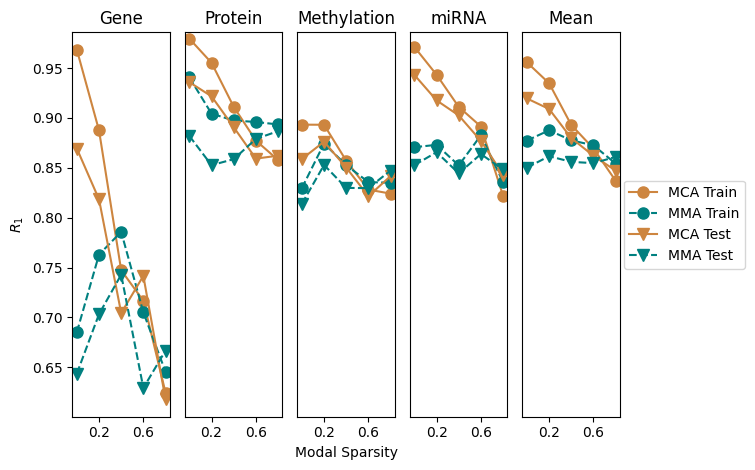

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'Gene':('gene_train_r10',
        'gene_test_r10'),
        'Protein':('protein_train_r10',
        'protein_test_r10'),
        'Methylation':('methylation_train_r10',
        'methylation_test_r10'),
        'miRNA':('mirna_train_r10',
        'mirna_test_r10'),
        'Mean':('train_r10_mean',
        'test_r10_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('$R_1$')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-1].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

('gene_train_median_rank', 'gene_test_median_rank')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.0
36    0.0
37    2.0
38    3.0
39    3.0
Name: gene_train_median_rank, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    1.0
36    1.0
37    3.0
38    2.0
39    3.0
Name: gene_test_median_rank, dtype: float64
('protein_train_median_rank', 'protein_test_median_rank')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.0
36    0.0
37    1.0
38    2.0
39    2.0
Name: protein_train_median_rank, dtype: float64
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    0.0
36    1.0
37    2.0
38    3.0
39    2.0
Name: protein_test_median_rank, dtype: float64
('methylation_train_median_rank', 'methylation_test_median_rank')
35    1.0
36    0.8
37    0.6
38    0.4
39    0.2
Name: sparsity, dtype: float64
35    3.0
36    2.0
37    4.0
38   

<Figure size 200x400 with 0 Axes>

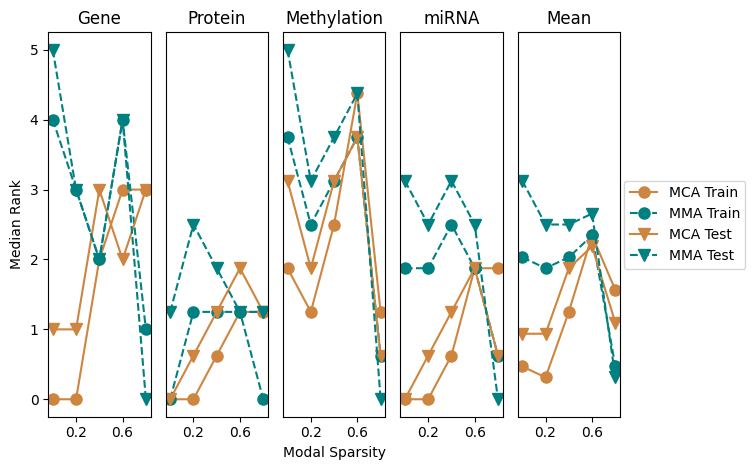

In [962]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_a[df_m_a['epoch']=='60']
dfz_t = df_z_a[df_z_a['epoch']=='80']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'Gene':('gene_train_median_rank',
        'gene_test_median_rank'),
        'Protein':('protein_train_median_rank',
        'protein_test_median_rank'),
        'Methylation':('methylation_train_median_rank',
        'methylation_test_median_rank'),
        'miRNA':('mirna_train_median_rank',
        'mirna_test_median_rank'),
        'Mean':('train_median_rank_mean',
        'test_median_rank_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('Median Rank')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[-1].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

('COVAREP_train_r1', 'COVAREP_test_r1')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.073375
31    0.044953
32    0.044803
33    0.076247
34    0.130958
Name: COVAREP_train_r1, dtype: float64
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.095690
31    0.044348
32    0.049192
33    0.081633
34    0.129512
Name: COVAREP_test_r1, dtype: float64
('FACET_train_r1', 'FACET_test_r1')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.423901
31    0.247757
32    0.410753
33    0.274077
34    0.308206
Name: FACET_train_r1, dtype: float64
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.382328
31    0.231970
32    0.389830
33    0.253863
34    0.302632
Name: FACET_test_r1, dtype: float64
('OpenFace_train_r1', 'OpenFace_test_r1')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.112428
31    0.0735

<Figure size 200x400 with 0 Axes>

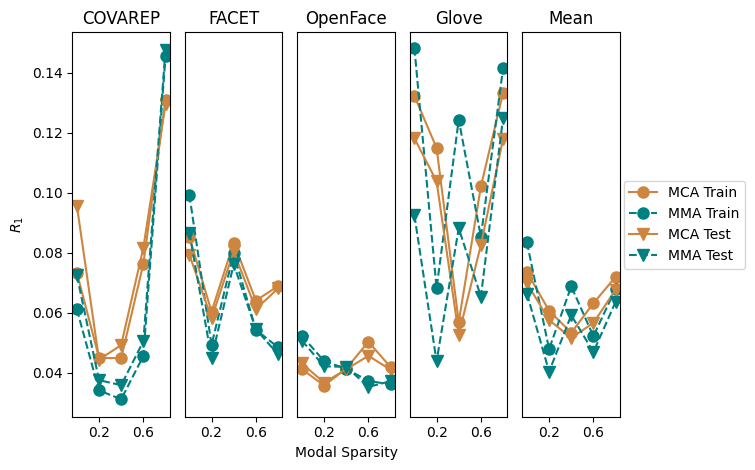

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'COVAREP':('COVAREP_train_r1',
        'COVAREP_test_r1'),
        'FACET':('FACET_train_r1',
        'FACET_test_r1'),
        'OpenFace':('OpenFace_train_r1',
        'OpenFace_test_r1'),
        'Glove':('glove_vectors_train_r1',
        'glove_vectors_test_r1'),
        'Mean':('train_r1_mean',
        'test_r1_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('$R_1$')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[4].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

('COVAREP_train_r5', 'COVAREP_test_r5')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.213050
31    0.130679
32    0.115868
33    0.178379
34    0.331695
Name: COVAREP_train_r5, dtype: float64
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.271552
31    0.126555
32    0.102056
33    0.169710
34    0.339703
Name: COVAREP_test_r5, dtype: float64
('FACET_train_r5', 'FACET_test_r5')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.707792
31    0.463811
32    0.662684
33    0.425054
34    0.497376
Name: FACET_train_r5, dtype: float64
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.672414
31    0.437567
32    0.668785
33    0.389625
34    0.495614
Name: FACET_test_r5, dtype: float64
('OpenFace_train_r5', 'OpenFace_test_r5')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.285994
31    0.1766

<Figure size 200x400 with 0 Axes>

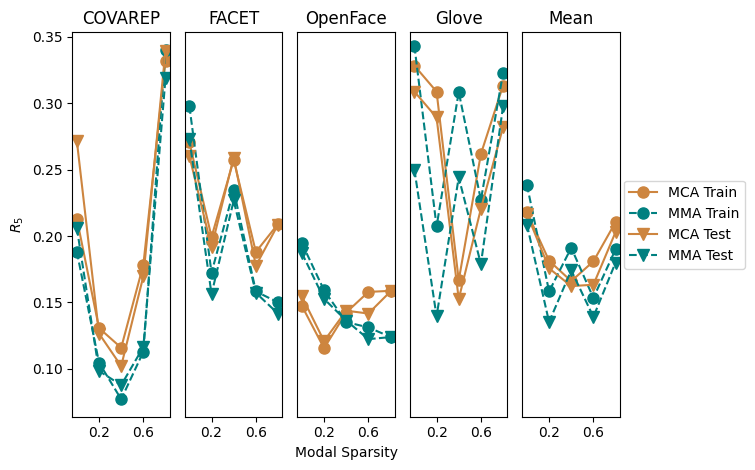

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'COVAREP':('COVAREP_train_r5',
        'COVAREP_test_r5'),
        'FACET':('FACET_train_r5',
        'FACET_test_r5'),
        'OpenFace':('OpenFace_train_r5',
        'OpenFace_test_r5'),
        'Glove':('glove_vectors_train_r5',
        'glove_vectors_test_r5'),
        'Mean':('train_r5_mean',
        'test_r5_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(df_t['sparsity']/100,ym,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('$R_5$')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[4].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

('COVAREP_train_r10', 'COVAREP_test_r10')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.309608
31    0.194018
32    0.172609
33    0.230030
34    0.433661
Name: COVAREP_train_r10, dtype: float64
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.371121
31    0.192537
32    0.165932
33    0.209452
34    0.441614
Name: COVAREP_test_r10, dtype: float64
('FACET_train_r10', 'FACET_test_r10')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.802247
31    0.572078
32    0.760016
33    0.504948
34    0.559399
Name: FACET_train_r10, dtype: float64
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.769828
31    0.543057
32    0.759181
33    0.475717
34    0.565789
Name: FACET_test_r10, dtype: float64
('OpenFace_train_r10', 'OpenFace_test_r10')
30    1.0
31    0.8
32    0.6
33    0.4
34    0.2
Name: sparsity, dtype: float64
30    0.391061
31

<Figure size 200x400 with 0 Axes>

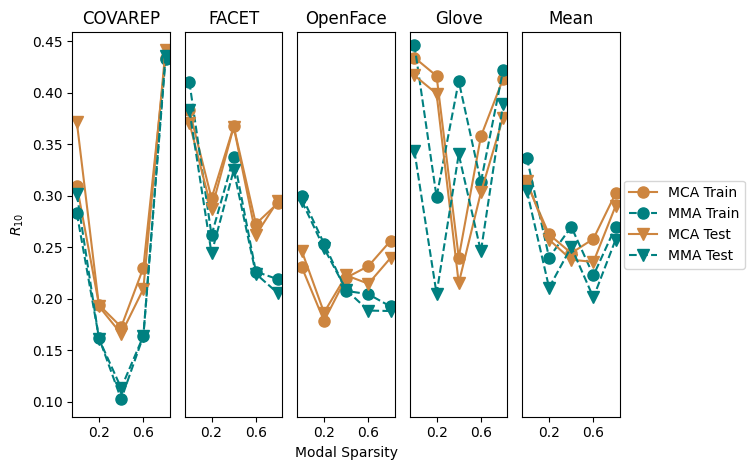

In [965]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'COVAREP':('COVAREP_train_r10',
        'COVAREP_test_r10'),
        'FACET':('FACET_train_r10',
        'FACET_test_r10'),
        'OpenFace':('OpenFace_train_r10',
        'OpenFace_test_r10'),
        'Glove':('glove_vectors_train_r10',
        'glove_vectors_test_r10'),
        'Mean':('train_r10_mean',
        'test_r10_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            if ym.max() > 10:
                ym = ym+1
                yz = yz+1
                ax.set_yscale('log')
            print((1-df_t['sparsity']/100))
            print(ym)
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('$R_{10}$')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[4].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,4))
lt = iter(['-o','--o','-X','--X'])
df_t = df_m_b[df_m_b['epoch']=='10']
dfz_t = df_z_b[df_z_b['epoch']=='12']
#print(df_z_b['epoch']=='12')
fig,axs = plt.subplots(1,5)
cols = {'COVAREP':('COVAREP_train_median_rank',
        'COVAREP_test_median_rank'),
        'FACET':('FACET_train_median_rank',
        'FACET_test_median_rank'),
        'OpenFace':('OpenFace_train_median_rank',
        'OpenFace_test_median_rank'),
        'Glove':('glove_vectors_train_median_rank',
        'glove_vectors_test_median_rank'),
        'Mean':('train_median_rank_mean',
        'test_median_rank_mean'),
       }
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
        lt = iter(['-o','--o','-v','--v'])
        ltot = iter([7017,707])
        print(v)
        ax = axs[i]
        for x in v:
            ym = df_t[x]
            yz = dfz_t[x]
            tot=next(ltot)
            #ax.plot(df_t['sparsity']/100,ym.div(1-df_t['sparsity']/100)*tot,next(lt), markersize=8)
            #ax.plot(dfz_t['sparsity']/100,yz.div(1-dfz_t['sparsity']/100)*tot,next(lt), markersize=8)
            ax.plot(df_t['sparsity']/100,ym,next(lt), color='peru', markersize=8)
            ax.plot(dfz_t['sparsity']/100,yz,next(lt), color='teal',markersize=8)
        ax.set_title(k)
        ax.set_xticks([0.2,0.6])
l,h=0,0
for i in range(1,len(axs)):
    y=axs[i].get_ylim() # align axes
    l,h=min(y[0],l),max(y[1],h)
for i in range(1,len(axs)):
    axs[i].set_ylim(l,h) # align axes
    axs[i].set_yticks([]) # set ticks to be empty (no ticks, no tick-labels)
axs[2].set_xlabel('Modal Sparsity')
axs[0].set_ylabel('Median Rank')
#plt.ylabel('$Avg. Uniformity$')
#plt.xlabel('Modal Sparsity')
plt.tight_layout()
leg=axs[4].legend(['MCA Train','MMA Train', 'MCA Test', 'MMA Test'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,frameon = True,facecolor = 'white')#,'MFD $R_5$','Zorro $R_5$','MFD $R_{10}$','Zorro $R_{10}$']))

('COVAREP_train_median_rank', 'COVAREP_test_median_rank')
('FACET_train_median_rank', 'FACET_test_median_rank')
('OpenFace_train_median_rank', 'OpenFace_test_median_rank')
('glove_vectors_train_median_rank', 'glove_vectors_test_median_rank')
('train_median_rank_mean', 'test_median_rank_mean')


<Figure size 200x400 with 0 Axes>

In [813]:
#!ls
df_loss = pd.read_csv('final_data_total_loss.csv')
df_test_loss = pd.read_csv('final_data_val_epoch_total_loss.csv')
df_train_hps = pd.read_csv('training_run_hps.csv')

In [814]:
df_loss = df_loss.drop([x for x in df_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)
nb_row=int(len(df_loss)/32)
df_epoch_loss=df_loss.groupby(df_loss.index // nb_row).mean()
df_test_loss = df_test_loss.drop([x for x in df_test_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)

In [815]:
df_test_loss.columns = [x.split(' ')[0] for x in df_test_loss.columns]
df_epoch_loss.columns = [x.split(' ')[0] for x in df_epoch_loss.columns]

In [816]:
df_train_hps = df_train_hps[df_train_hps['Name'].isin([x.split(' ')[0] for x in list(df_loss.columns)])].fillna(0.0).sort_values(by=['zorro',"modality_config.COVAREP.dropout"])

In [817]:
df_epoch_loss

Step  fluent-microwave-128  scarlet-capybara-28  stilted-galaxy-129  \
0    1306.0           1323.073769           166.168681          890.859158   
1    4077.0              8.463190             2.567084            6.996959   
2    6848.0              6.785723             1.704604            5.285065   
3    9619.0              5.593036             1.328035            3.948787   
4   12390.0              4.955289             1.026275            3.548081   
5   15161.0              3.864762             0.863897            2.669555   
6   17932.0              3.376033             0.699880            2.266361   
7   20703.0              2.540220             0.608507            2.125982   
8   23474.0              2.411615             0.509210            1.837415   
9   26245.0              2.268159             0.466651            1.572523   
10  29016.0              1.837949             0.353464            1.280072   
11  31787.0              1.504936             0.264322            1.079965   
12  34558.0              1.259533             0.249907            0.932493   
13  37329.0              1.050491             0.213968            0.786153   
14  40100.0              0.917494             0.170979            0.639202   
15  42871.0              0.793621             0.135289            0.564509   
16  45642.0              0.675571             0.125362            0.457670   
17  48413.0              0.528104             0.100027            0.379138   
18  51184.0              0.468424             0.079539            0.332440   
19  53955.0              0.389247             0.080679            0.278739   
20  56726.0              0.351065             0.051741            0.240749   
21  59497.0              0.305762             0.044886            0.210968   
22  62268.0              0.252646             0.032923            0.188752   
23  65039.0              0.193312             0.025644            0.162029   
24  67810.0              0.187921             0.024357            0.145370   
25  70581.0              0.156725             0.017559            0.137953   
26  73352.0              0.145379             0.018378            0.113531   
27  76123.0              0.137794             0.013531            0.108713   
28  78894.0              0.120255             0.010069            0.103217   
29  81665.0              0.111793             0.010103            0.096555   
30  84436.0              0.110224             0.008852            0.091869   
31  87207.0              0.099464             0.009555            0.100008   

    toasty-galaxy-21  resilient-salad-136  fallen-wind-29  crimson-sunset-23  \
0         145.260435          1013.176829      213.694730         201.099181   
1           2.300644             7.375548        2.385695           2.394442   
2           1.611382             5.312633        1.795698           1.649337   
3           1.283427             3.547025        1.342933           1.386294   
4           1.065262             3.131404        1.192210           1.127673   
5           0.861908             2.688734        1.049633           0.981999   
6           0.777071             2.387012        0.865259           0.810019   
7           0.698243             2.182949        0.752773           0.758077   
8           0.579996             1.862784        0.658920           0.637237   
9           0.503376             1.707968        0.595847           0.535530   
10          0.401482             1.455862        0.505026           0.444732   
11          0.337971             1.279489        0.438051           0.352748   
12          0.269487             1.125058        0.326548           0.278449   
13          0.208802             0.977283        0.267766           0.220887   
14          0.163194             0.819923        0.211576           0.184299   
15          0.134417             0.700510        0.174123           0.156675   
16          0.107994             0.616398        0.137879           0.12

In [818]:
df_test_loss['epoch'] = list(range(32))
df_epoch_loss['epoch'] = list(range(32))

In [819]:
plt.figure(figsize=(1,2))
lt = iter(['-o','--o','-X','--X'])
fig,ax = plt.subplots(1,figsize=(4,4))
df_cols = df_train_hps[df_train_hps.zorro]
df_t = df_epoch_loss
dfz_t = df_test_loss
cols = {k:v for k,v in zip(df_cols['modality_config.COVAREP.dropout'],df_cols.Name)}
lt = ['-','--']
ct = ['k','peru','tomato','teal','olive']
#lt = [y+x for x in ct for y in lt]
#print(lt)
tc =iter(ct)
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
    c=next(tc)
    ym = df_t[v]
    yz = dfz_t[v]
    ax.plot(df_t['epoch'],ym,'-', color =c, markersize=4, label = k)
    ax.plot(dfz_t['epoch'],yz,'--', color=c,markersize=4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.ylim([0,6])
plt.xlim([1,32])
plt.axvline(x=12,color='k',ls=':', label="Epoch Used")#, label='axvline - full height')
plt.legend()
plt.tight_layout()
fig.savefig('fig_a1z.eps', format='eps', dpi=1200)
!ls

/var/folders/fj/g190z8y944x0v6yd0lpw_8980000gn/T/ipykernel_59423/1526239957.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,6])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Figures
LTJournalArticle.cls
TCGA-CDR-SupplementalTableS1.numbers
Untitled.drawio
Untitled.ipynb
arxiv.sty
basicdata.csv
basicdata_tcga.csv
basicdata_tcga_c.csv
data_proc_tcga.csv
data_proc_tcga.numbers
data_proc_tcga_c.csv
data_proc_tcga_c.numbers
data_procs.csv
data_procs.numbers
data_procs_trimmed.csv
fig1.drawio
fig1.drawio.png
fig_3a-eps-converted-to.pdf
fig_3a.eps
fig_3b-eps-converted-to.pdf
fig_3b.eps
fig_3c-eps-converted-to.pdf
fig_3c.eps
fig_4c-eps-converted-to.pdf
fig_4c.eps
fig_4t-eps-converted-to.pdf
fig_4t.eps
fig_5c-eps-converted-to.pdf
fig_5c.eps
fig_5t-eps-converted-to.pdf
fig_5t.eps
fig_6a-eps-converted-to.pdf
fig_6a.eps
fig_6b-eps-converted-to.pdf
fig_6b.eps
fig_6c-eps-converted-to.pdf
fig_6c.eps
fig_6d-eps-converted-to.pdf
fig_6d.eps
fig_a1m-eps-converted-to.pdf
fig_a1m.eps
fig_a1m.svg
fig_a1z-eps-converted-to.pdf
fig_a1z.eps
fig_a1z.svg
fig_a2m-eps-converted-to.pdf
fig_a2m.eps
fig_a2z-eps-converted-to.pdf
fig_a2z.eps
fig_a3ac-eps-converted-to.pdf
fig_a3ac.eps
fig_a3

<Figure size 100x200 with 0 Axes>

/var/folders/fj/g190z8y944x0v6yd0lpw_8980000gn/T/ipykernel_59423/4018486680.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,2])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 100x200 with 0 Axes>

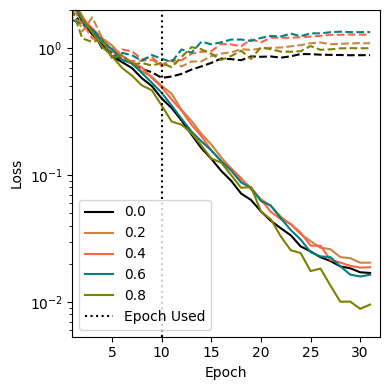

In [823]:
plt.figure(figsize=(1,2))
lt = iter(['-o','--o','-X','--X'])
fig,ax = plt.subplots(1,figsize=(4,4))
df_cols = df_train_hps[~df_train_hps.zorro]
df_t = df_epoch_loss
dfz_t = df_test_loss
cols = {k:v for k,v in zip(df_cols['modality_config.COVAREP.dropout'],df_cols.Name)}
lt = ['-','--']
ct = ['k','peru','tomato','teal','olive']
lt = [y+x for x in ct for y in lt]
tc=iter(ct)
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
    c=next(tc)
    ym = df_t[v]
    yz = dfz_t[v]
    ax.plot(df_t['epoch'],ym,'-', color =c, markersize=4, label = k)
    ax.plot(dfz_t['epoch'],yz,'--', color=c,markersize=4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.ylim([0,2])
plt.xlim([1,32])
plt.axvline(x=10,color='k',ls=':', label="Epoch Used")#, label='axvline - full height')

plt.legend()
plt.tight_layout()
fig.savefig('fig_a1m.eps', format='eps', dpi=1200)

In [825]:
#!ls
df_loss = pd.read_csv('total_loss_tcga.csv')
df_test_loss = pd.read_csv('final_data_val_epoch_total_loss_tcga.csv')
df_train_hps = pd.read_csv('training_run_hps.csv')

In [826]:
df_loss = df_loss.drop([x for x in df_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)
nb_row=int(len(df_loss)/128)
df_epoch_loss=df_loss.groupby(df_loss.index // nb_row).mean()
df_test_loss = df_test_loss.drop([x for x in df_test_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)

In [827]:
df_test_loss.columns = [x.split(' ')[0] for x in df_test_loss.columns]
df_epoch_loss.columns = [x.split(' ')[0] for x in df_epoch_loss.columns]

In [828]:
df_train_hps = df_train_hps[df_train_hps['Name'].isin([x.split(' ')[0] for x in list(df_loss.columns)])].fillna(0.0).sort_values(by=['zorro',"modality_config.gene.dropout"])

In [829]:
df_train_hps

Name  zorro  modality_config.gene.dropout  \
12     stellar-brook-10  False                           0.0   
19      astral-water-11  False                           0.2   
18         zany-tree-14  False                           0.4   
11      sandy-sponge-16  False                           0.6   
13        lively-bee-15  False                           0.8   
16      astral-night-19   True                           0.0   
15     grateful-jazz-13   True                           0.2   
17     elated-durian-12   True                           0.4   
14      drawn-cosmos-17   True                           0.6   
10  chocolate-vortex-18   True                           0.8   

    modality_config.COVAREP.dropout               dataset   fcl  \
12                              0.0  /shared/tcga_dataset  True   
19                              0.0  /shared/tcga_dataset  True   
18                              0.0  /shared/tcga_dataset  True   
11                              0.0  /shared/tcga_dataset  True   
13                              0.0  /shared/tcga_dataset  True   
16                              0.0  /shared/tcga_dataset  True   
15                              0.0  /shared/tcga_dataset  True   
17                              0.0  /shared/tcga_dataset  True   
14                              0.0  /shared/tcga_dataset  True   
10                              0.0  /shared/tcga_dataset  True   

    val_epoch_total_loss (Min)  val_epoch_fcl (Min)  val_epoch_no-fcl (Min)  \
12                    0.368993             0.268968                0.832746   
19                    0.501165             0.372081                0.938156   
18                    0.674631             0.539343                1.191458   
11                    0.872713             0.694713                1.263677   
13                    0.614062             0.446594                0.603420   
16                    0.586457             0.000000                0.000000   
15                    0.656629             0.000000                0.000000   
17                    1.019131             0.000000                0.000000   
14                    1.360329             0.000000                0.000000   
10                    0.793205             0.000000                0.000000   

      no-fcl  
12  0.047309  
19  0.099241  
18  0.088526  
11  0.026240  
13  0.002437  
16  0.000000  
15  0.000000  
17  0.000000  
14  0.000000  
10  0.000000

In [830]:
df_test_loss['epoch'] = list(range(128))
df_epoch_loss['epoch'] = list(range(128))

In [832]:
plt.figure(figsize=(1,2))
lt = iter(['-o','--o','-X','--X'])
fig,ax = plt.subplots(1,figsize=(4,4))
df_cols = df_train_hps[df_train_hps.zorro]
df_t = df_epoch_loss
dfz_t = df_test_loss
cols = {k:v for k,v in zip(df_cols['modality_config.gene.dropout'],df_cols.Name)}
lt = ['-','--']
ct = ['k','peru','tomato','teal','olive']
tc=iter(ct)
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
    ym = df_t[v]
    yz = dfz_t[v]
    c=next(tc)
    ax.plot(df_t['epoch'],ym,'-',color=c, markersize=4, label = k)
    ax.plot(dfz_t['epoch'],yz,'--',color=c, markersize=4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.ylim([0,10])
plt.xlim([1,128])
plt.axvline(x=80,color='k',ls=':', label="Epoch Used")#, label='axvline - full height')
plt.legend()
plt.tight_layout()
fig.savefig('fig_a2z.eps', format='eps', dpi=1200)

/var/folders/fj/g190z8y944x0v6yd0lpw_8980000gn/T/ipykernel_59423/2396492761.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 100x200 with 0 Axes>

In [835]:
plt.figure(figsize=(1,2))
lt = iter(['-o','--o','-X','--X'])
fig,ax = plt.subplots(1,figsize=(4,4))
df_cols = df_train_hps[~df_train_hps.zorro]
df_t = df_epoch_loss
dfz_t = df_test_loss
cols = {k:v for k,v in zip(df_cols['modality_config.gene.dropout'],df_cols.Name)}
lt = ['-','--']
ct = ['k','peru','tomato','teal','olive']
tc=iter(ct)
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
    ym = df_t[v]
    yz = dfz_t[v]
    c=next(tc)
    ax.plot(df_t['epoch'],ym,'-',color=c, markersize=4, label = k)
    ax.plot(dfz_t['epoch'],yz,'--',color=c, markersize=4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.ylim([0,10])
plt.xlim([1,128])
plt.axvline(x=60,color='k',ls=':', label="Epoch Used")#, label='axvline - full height')
plt.legend()
plt.tight_layout()
fig.savefig('fig_a2m.eps', format='eps', dpi=1200)

/var/folders/fj/g190z8y944x0v6yd0lpw_8980000gn/T/ipykernel_59423/1320353192.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,10])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 100x200 with 0 Axes>

In [66]:
#!ls
import pandas as pd
df_loss = pd.read_csv('TCGA_EAO_total_loss.csv')
df_test_loss = pd.read_csv('TCGA_EAO_val_epoch_loss.csv')
df_train_hps = pd.read_csv('training_run_hps.csv')

In [67]:
df_loss = df_loss.drop([x for x in df_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)
nb_row=int(len(df_loss)/110)
df_epoch_loss=df_loss.groupby(df_loss.index // nb_row).mean()
df_test_loss = df_test_loss.drop([x for x in df_test_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)

In [68]:
df_test_loss.columns = ['Step','0.0','0.2','0.4','0.6'] #[x.split(' ')[0] for x in df_test_loss.columns]
df_epoch_loss.columns = ['Step','0.0','0.2','0.4','0.6'] #[x.split(' ')[0] for x in df_epoch_loss.columns]

In [69]:
df_train_hps = df_train_hps[df_train_hps['Name'].isin([x.split(' ')[0] for x in list(df_loss.columns)])].fillna(0.0).sort_values(by=['zorro',"modality_config.gene.dropout"])

In [70]:
df_test_loss['epoch'] = list(range(111))
df_epoch_loss['epoch'] = list(range(111))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 100x200 with 0 Axes>

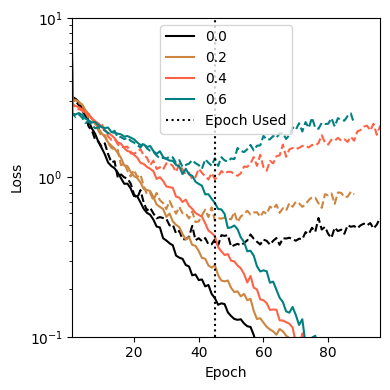

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,2))
lt = iter(['-o','--o','-X','--X'])
fig,ax = plt.subplots(1,figsize=(4,4))
df_cols = df_train_hps[~df_train_hps.zorro]
df_t = df_epoch_loss
dfz_t = df_test_loss
#cols = {k:v for k,v in zip(df_cols['modality_config.gene.dropout'],df_cols.Name)}
cols = {'0.0':'0.0','0.2':'0.2','0.4':'0.4','0.6':'0.6'}
lt = ['-','--']
ct = ['k','peru','tomato','teal','olive']
tc=iter(ct)
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
    ym = df_t[v]
    yz = dfz_t[v]
    c=next(tc)
    ax.plot(df_t['epoch'],ym,'-',color=c, markersize=4, label = k)
    ax.plot(dfz_t['epoch'],yz,'--',color=c, markersize=4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.ylim([0.1,10])
plt.xlim([1,96])
plt.axvline(x=45,color='k',ls=':', label="Epoch Used")#, label='axvline - full height')
plt.legend()
plt.tight_layout()
fig.savefig('fig_a2m_eao_tcga.eps', format='eps', dpi=1200)

In [55]:
#!ls
import pandas as pd
df_loss = pd.read_csv('CMU_EAO_total_loss.csv')
df_test_loss = pd.read_csv('CMU_EAO_val_epoch_loss.csv')
print(df_loss)
df_train_hps = pd.read_csv('training_run_hps.csv')
df_loss = df_loss.drop([x for x in df_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)
print(df_loss)
nb_row=int(len(df_loss)/30)
df_epoch_loss=df_loss.groupby(df_loss.index // nb_row).mean()
df_test_loss = df_test_loss.drop([x for x in df_test_loss.columns if any([y in x for y in ["MIN","MAX"]])], axis=1)
df_test_loss.columns = ['Step','0.0','0.2','0.4','0.6'] #[x.split(' ')[0] for x in df_test_loss.columns]
df_epoch_loss.columns = ['Step','0.0','0.2','0.4','0.6'] #[x.split(' ')[0] for x in df_epoch_loss.columns]
df_train_hps = df_train_hps[df_train_hps['Name'].isin([x.split(' ')[0] for x in list(df_loss.columns)])].fillna(0.0).sort_values(by=['zorro',"modality_config.gene.dropout"])
df_test_loss['epoch'] = list(range(30))
df_epoch_loss['epoch'] = list(range(31))

        Step  CMU 0.0 - total_loss  CMU 0.0 - total_loss__MIN  \
0          0           1169.782593                1169.782593   
1          4           1177.210327                1177.210327   
2          8           1188.278687                1188.278687   
3         12           1128.911133                1128.911133   
4         16           1119.842407                1119.842407   
...      ...                   ...                        ...   
20137  85078                   NaN                        NaN   
20138  85082                   NaN                        NaN   
20139  85086                   NaN                        NaN   
20140  85090                   NaN                        NaN   
20141  85094                   NaN                        NaN   

       CMU 0.0 - total_loss__MAX  CMU 0.2 - total_loss  \
0                    1169.782593           1323.421143   
1                    1177.210327           1302.148071   
2                    1188.278687           13

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 100x200 with 0 Axes>

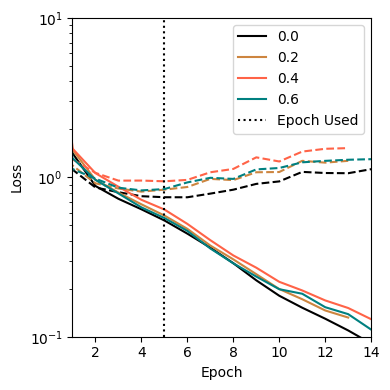

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,2))
lt = iter(['-o','--o','-X','--X'])
fig,ax = plt.subplots(1,figsize=(4,4))
df_cols = df_train_hps[~df_train_hps.zorro]
df_t = df_epoch_loss
dfz_t = df_test_loss
#cols = {k:v for k,v in zip(df_cols['modality_config.gene.dropout'],df_cols.Name)}
cols = {'0.0':'0.0','0.2':'0.2','0.4':'0.4','0.6':'0.6'}
lt = ['-','--']
ct = ['k','peru','tomato','teal','olive']
tc=iter(ct)
for i,(k,v) in enumerate(cols.items()):#['train_uniformity_mean','test_uniformity_mean']:
    ym = df_t[v]
    yz = dfz_t[v]
    c=next(tc)
    ax.plot(df_t['epoch'],ym,'-',color=c, markersize=4, label = k)
    ax.plot(dfz_t['epoch'],yz,'--',color=c, markersize=4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.ylim([0.1,10])
plt.xlim([1,14])
plt.axvline(x=5,color='k',ls=':', label="Epoch Used")#, label='axvline - full height')
plt.legend()
plt.tight_layout()
fig.savefig('fig_a2m_eao_cmu.eps', format='eps', dpi=1200)